In [1]:
# Turns on autocomplete?!
%config Completer.use_jedi = False

import requests
import time
import pandas as pd
import re
import matplotlib.pyplot as plt
from datetime import datetime

from bs4 import BeautifulSoup
from selenium.common.exceptions import NoSuchElementException
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

# headless background execution
# if chrome driver out of date, use brew update chromedriver in terminal
Options = Options()
Options.headless = True
browser = webdriver.Chrome(options=Options)

In [2]:
# Gives general info on an nft collection
# @param nft collection url in string format
# TODO return nums in ints
def find_collection_info(collection_url):
    browser.get(collection_url)
    time.sleep(2)
    
    #key info about collection
    num_unique_nfts = browser.find_element_by_xpath(".//*[@id=\"root\"]/div/div[4]/div/div[1]/div[2]/div/div[2]/div/div/div[1]/div/span").text
    num_unique_nfts_for_sale = browser.find_element_by_xpath("//*[@id=\"panel-0\"]/div/div[1]/div[1]/p").text
    collection_floor_price = browser.find_element_by_xpath(".//*[@id=\"root\"]/div/div[4]/div/div[1]/div[2]/div/div[2]/div/div/div[2]/div/span").text
    total_volume_of_collection = browser.find_element_by_xpath(".//*[@id=\"root\"]/div/div[4]/div/div[1]/div[2]/div/div[2]/div[1]/div/div[3]/div/span").text
    num_non_unique_nfts_for_sale = browser.find_element_by_xpath("//*[@id=\"root\"]/div/div[4]/div/div[1]/div[2]/div/div[2]/div[1]/div/div[4]/div/span").text
    
    print("There are " + num_unique_nfts + " unique nfts in this collection \nand " + num_unique_nfts_for_sale[0] + " unique nfts for sale.")
    print("Floor price is " + collection_floor_price + "eth.")
    print("This collection has " + total_volume_of_collection + "eth in total volume.")
    print("There are " + num_non_unique_nfts_for_sale + " nfts for sale in this collection.")
    
    ###return [int(num_unique_nfts), int(num_unique_nfts_for_sale), int(collection_floor_price), int(total_volume_of_collection), int(num_non_unique_nfts_for_sale)]


In [5]:
find_collection_info("https://nft.gamestop.com/collection/MetaBoyHonorary?r=MCwzOTc2MCw3MDE%3D")
find_collection_info("https://nft.gamestop.com/collection/overwhelmed")

There are 7 unique nfts in this collection 
and 7 unique nfts for sale.
Floor price is 0.03eth.
This collection has 872.5eth in total volume.
There are 1.6k nfts for sale in this collection.
There are 0 unique nfts in this collection 
and 4 unique nfts for sale.
Floor price is 0eth.
This collection has 0eth in total volume.
There are 0 nfts for sale in this collection.


In [6]:
browser.get("https://nft.gamestop.com/token/0xdddc38d718920a50cc08d671150b96f188f454b9/0x7a36696d4d91ee5b1a39d867b3d2f0838f61d6172a20b802a3c461a7cd23a11e")
time.sleep(2)
rand_obj = browser.find_element_by_xpath(".//*[@id=\"root\"]/div/div[4]/div/article/section[2]/div[2]/div/div[1]/p/span/strong[3]").text
print(rand_obj)





0.055 ETH ($91.35)


In [3]:
# Replaces char at index 

def replace_str_index(text,index=0,replacement=''):
    return '%s%s%s'%(text[:index],replacement,text[index+1:])

# Turns .123 ETH... string to .123 float of eth per sale
# @param
def string_to_price(string):
    #num_spaces = string.count(" ")
    # if val < .01 just register it as .0001 float val
    if(string == "< 0.01 ETH"):
        return .0001
    
    space_pos = string.find(" ")
    return float(string[:space_pos])

In [4]:
# Takes in sale date and converts it to meaningful int value so to plot a price/time graph
# Seems to work well, optimization would be good tho
def sale_price_to_int_value(sale_date_string):
    re_integer_index = re.search(r"\d", sale_date_string)
    integer_index = re_integer_index.start()
    number_in_date = 0
    for i in range(integer_index, len(sale_date_string)):
        if(sale_date_string[i] == " "):
            number_in_date = int(sale_date_string[integer_index:i])
            break
    if("hours" in sale_date_string):
        return number_in_date
    if("days" in sale_date_string):
        return number_in_date*24
    if(("month" or "months") in sale_date_string):
        return number_in_date*24*30
    else:
        print("Add new metric for these vals")
print(sale_price_to_int_value("about 1 month ago"))

720


In [5]:
def sale_hist_plotter(sale_hist_dataframe):
    sale_hist_df.plot(x = "Sale Date", y = "Sale Price")
    plt.show()

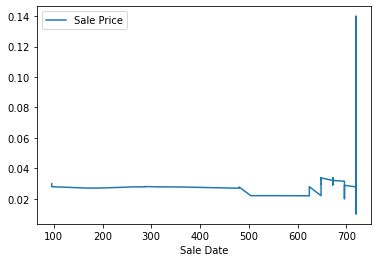

In [6]:


# Gets price history of a single nft
# Will plot prices over time
# @param = url of an nft in string format
def nft_sale_history(single_nft_url):
    browser.get(single_nft_url)
    time.sleep(2)
    
    price_ls = []
    sale_date_ls = []
    # 1 = first sale ever
    i = 1
    highest = 0.0
    lowest = 10000.0
    # Scrape prices until there are no more, and break out loop
    while(True): 
        price_path = ".//*[@id=\"root\"]/div/div[4]/div/article/section[2]/div[2]/div/div[1]/p/span/strong[3]"
        sale_date_path = ".//*[@id=\"root\"]/div/div[4]/div/article/section[2]/div[2]/div/div[1]/span"
        
        # Creates new path for each different sale
        new_price_path = replace_str_index(price_path, 66, i)
        new_sale_date_path = replace_str_index(sale_date_path, 66, i)
        
        try:
            price_at_index = browser.find_element_by_xpath(new_price_path).text
            sale_date_at_index = browser.find_element_by_xpath(new_sale_date_path).text
        except NoSuchElementException:
            break
        
        int_price = string_to_price(price_at_index)
        if(int_price > highest):
            highest = int_price
        if(int_price < lowest):
            lowest = int_price
        price_ls.append(int_price)
        
        sale_date_ls.append(sale_date_at_index)
        i +=1
    
    new_sale_date_ls = []
    for sale_date in sale_date_ls[::-1]:
        new_sale_date_ls.append(sale_price_to_int_value(sale_date))
    
    # Possibly add function for someone buying multiple at once for a multiple of the nft price.
    # Ex mint price is .027Eth if someone buys .054Eth of the nft they may have bought multiple.
    
    price_date_df = pd.DataFrame({
        "Sale Price":price_ls,
        "Sale Date": new_sale_date_ls,
        "High": highest,
        "Lowest": lowest
        
    })
    return price_date_df
        #print("sold for " + str(int_price) + "eth " + sale_date_at_index)
    #print("total sales = " + str(len(price_ls)))

#sale_hist_df = nft_sale_history("https://nft.gamestop.com/token/0x50f7c99091522898b3e0b8a5b4bd2d48385fe99e/0x27c27cc825e7791664c10d7012b9ba9a6e2b1ded166a4e1bd49158fecc7e14cf")
sale_hist_df = nft_sale_history("https://nft.gamestop.com/token/0x000e09b2efeb016872cd121ff648a39031f3f0df/0xe992c9a69f67a5a04b5e7c07f0de3aa69cc9b086808e6f8710431723123d5ca7")
sale_hist_plotter(sale_hist_df)
#def num_nfts_on_pg()



In [11]:
#Find where to change string
print(".//*[@id=\"panel-0\"]/div/div/table/tbody/tr[2]/td[2]/span/p[1]".find("2"))

43


In [7]:
# TODO
#
# Make it part of stat_page_output function, and make it 7 per column after running this once or twice
# That way it work and runs this by default
# Fails when opening, to fix delete last column and run it.
# Add coloring for the page
def rank_change_difference(filename, cols_per_pagestat_output = 7):
    df = pd.read_csv(filename)
    last_column = df.iloc[0, -1]
    print(last_column)
    if(last_column == "Rank Changes"):
        return 0
    num_cols = len(df.axes[1])
    print(num_cols)
    # not sure why it works like this
    rec_name_index = num_cols - cols_per_pagestat_output + 2
    print(rec_name_index)
    #checks out...
    old_name_index = rec_name_index - cols_per_pagestat_output
    print(old_name_index)

    ls = []
    for row in df.iloc[:, rec_name_index]:
        ls.append(row)
    
    rank_diff_ls = []
    
    for i in range(50):
        # if name is not in new list, add as new addition
        if(len(rank_diff_ls) == (i-1)):
            rank_diff_ls.append("New Addition")
        
        for j in range(50):
            if(ls[i] == df.iloc[j, old_name_index]):
                
                recent_rank = df.iloc[i,rec_name_index-1]
                
                old_rank = df.iloc[j,old_name_index-1]
                
                # rank @ this loc = 
                #try:
                
                rank_diff_ls.append(int(old_rank - recent_rank))
                print([ls[i], df.iloc[j, rec_name_index]], recent_rank, old_rank ,old_rank - recent_rank)
                
                #except TypeError:
                #    print("Probably need to look at csv format. Make sure it is to the standard.")
                #    break
        
        
    
    new_df = pd.DataFrame({
    "Rank Changes" : rank_diff_ls
    })
    
    pd.concat([df, new_df], axis=1).to_csv(filename, index=False, na_rep='N/A')
    #return (new_df)

print(rank_change_difference("updated_file_2.csv", 7))


9/11/22 15:26
216
211
204
['CYBER CREW [C4]', 'CYBER CREW [C4]'] 1.0 1.0 0.0
['GMERICA 1 by GameStop', 'MetaBoy Airdrop'] 3.0 5.0 2.0
['🍒🥭🍎🍊🍐🍍🥝🍇🍈🍌🍏🍉�...', 'Polyform Labs'] 4.0 2.0 -2.0
['MetaBoy Airdrop', 'CYBER CREW COLLECTORS CLU...'] 5.0 7.0 2.0
['2D Animation Loops', "Warden's Reach"] 6.0 15.0 9.0
['MetaBoy', "Inequity's Book"] 8.0 21.0 13.0
['CYBER CREW AIRDROP', 'GMERICA 1 by GameStop'] 9.0 3.0 -6.0
['CAVIDMDW Airdrop', 'CYBER CREW AIRDROP'] 10.0 9.0 -1.0
['CYBER CELEBRATION', 'NFTarot'] 12.0 26.0 14.0
["Chapter II - The Pursuer'...", 'MetaBoy'] 13.0 8.0 -5.0
['Tilt of Power', 'Neon vibes'] 14.0 34.0 20.0
["Warden's Reach", 'The Gamer Room'] 15.0 28.0 13.0
['The Aftermath', '2D Animation Loops'] 16.0 6.0 -10.0
['HyperViciouZ', 'POPeArt 2'] 17.0 20.0 3.0
['THE CONSERVATION', 'THE CONSERVATION'] 18.0 18.0 0.0
['Midnight Miami', 'Soulies'] 19.0 41.0 22.0
['PROTAGONISTS', 'Sloppypencil Art Drops'] 23.0 11.0 -12.0
["PBB's Hatchables 2", 'Midnight Miami'] 24.0 19.0 -5.0
['The Gamer Roo

In [10]:
# Breaks down stats of top 50 nft collections, appends data to csv
# TODO Change amounts to doubles .123 ETH

def stat_page_output(filename, stats_page_url):
    browser.get(stats_page_url)
    time.sleep(2)
    
    name_ls = []
    total_volume_ls = []
    change_in_vol_ls = []
    floor_price_ls = []
    # TODO Find better way to do this
    now = datetime.now()
    sys_time = now.strftime("%m/%d/%Y %H:%M:%S")
    time_ls = [sys_time]
    
    # 2 = first collection row
    i = 2
    str_change_location = 43
    while(True): 
        name_path = ".//*[@id=\"panel-0\"]/div/div/table/tbody/tr[2]/td[1]/a/p[2]"
        total_volume_path = ".//*[@id=\"panel-0\"]/div/div/table/tbody/tr[2]/td[2]/span/p[1]"
        percent_change_path = ".//*[@id=\"panel-0\"]/div/div/table/tbody/tr[2]/td[3]/p"
        floor_price_path = ".//*[@id=\"panel-0\"]/div/div/table/tbody/tr[2]/td[4]/span/p[1]"
        
        new_name_path = replace_str_index(name_path, 43, i)
        new_volume_path = replace_str_index(total_volume_path, 43, i)
        new_percent_change_path = replace_str_index(percent_change_path, 43, i)
        new_floor_path = replace_str_index(floor_price_path, 43, i)
                
        try:
            name_at_index = browser.find_element_by_xpath(new_name_path).text
            volume_at_index = browser.find_element_by_xpath(new_volume_path).text
            change_at_index = browser.find_element_by_xpath(new_percent_change_path).text
            floor_at_index = browser.find_element_by_xpath(new_floor_path).text
            
        except NoSuchElementException:
            break
        
        volume_at_index_float = string_to_price(volume_at_index)
        floor_at_index_float = string_to_price(floor_at_index)
        
        name_ls.append(name_at_index)
        total_volume_ls.append(volume_at_index_float)
        change_in_vol_ls.append(change_at_index)
        floor_price_ls.append(floor_at_index_float)
        
        #TODO find better way
        time_ls.append(0)
        
        i +=1
        
    print(name_ls)
    print(total_volume_ls)
    print(change_in_vol_ls)
    print(floor_price_ls)
    
    rank_ls = []
    for n in range(1,51):
        rank_ls.append(n)
    
    new_df = pd.DataFrame({
        "Rank": rank_ls,
        "Name of Collection": name_ls,
        "Total volume of Collection (ETH)": total_volume_ls,
        "Change in Daily volume (ETH))": change_in_vol_ls,
        "Floor Price of Collection": floor_price_ls,
        "Time of Scrape": sys_time
    })
    
    original_df = pd.read_csv(filename)
    pd.concat([original_df, new_df], axis=1).to_csv(filename, index=False, na_rep='N/A')
    # Just added and is working??? <3 <3 <3
    rank_change_difference(filename)
    
    
    #df.to_csv("my_new_file.csv", mode="a", index=False)

stat_page_output("updated_file_2.csv","https://nft.gamestop.com/stats")
    

["Chapter II - The Pursuer'...", 'KICK ASS VOL. 2', 'CYBER CREW [C4]', 'GMERICA 1 by GameStop', 'MetaBoy', 'KICK ASS VOL. 1', '🍒🥭🍎🍊🍐🍍🥝🍇🍈🍌🍏🍉�...', 'CYBER CELEBRATION', 'THE CONSERVATION', 'CYBER CREW AIRDROP', 'KICK ASS VOL. 1 AIRDROP', 'MetaBoy Honorary', 'Polyform Labs', 'POPeArt 2', 'MetaBoy Airdrop', 'dTweenie Specials', '2D Animation Loops', 'dTweenies', 'Ordinary NFT Cards', 'PLS&TY Collections', 'Boop & Frens', 'The Aftermath', 'Launch Day', 'Midnight Miami', 'The E-Girlz Madness Colle...', 'CYBERDELICS', 'Loopieverse: Collabs', 'Sloppypencil Art Drops', '2D Universe', 'PROTAGONISTS', "Warden's Reach", '4THELULZ', 'Power 2 The Apes!', 'PXL Toys | Interactive', 'REBORN', '101 Poos', 'Story Cards', 'Layer 2 Mechs (Drop #6)', 'yaramart', 'Midnight Airdrops', 'PLS&TY Weekly', 'Fully Baked Art - CAT REP...', 'CAVIDMDW Airdrop', "PBB's Hatchables 2", 'Neon vibes', 'Beep Stickers', 'NFT Mart', 'Hootie-Brains - Series 2', 'Dankclops main collection...', "Inequity's Book"]
[54.28, 49.33, 

In [ ]:
def this_function_not_needed_anymore():
    return 0
# TODO
# This function not NEEDED
# Make it part of stat_page_output function, and make it 7 per column after running this once or twice
# That way it work and runs this by default
# Add coloring for the page
def rank_change_difference(filename, cols_per_pagestat_output = 7):
    df = pd.read_csv(filename)
    num_cols = len(df.axes[1])
    print(num_cols)
    # not sure why it works like this
    rec_name_index = num_cols - cols_per_pagestat_output + 2
    print(rec_name_index)
    #checks out...
    old_name_index = rec_name_index - cols_per_pagestat_output
    print(old_name_index)

    ls = []
    for row in df.iloc[:, rec_name_index]:
        ls.append(row)
    
    
    
    rank_diff_ls = []
    
    for i in range(50):
        # if name is not in new list, add as new addition
        if(len(rank_diff_ls) == (i-1)):
            rank_diff_ls.append("New Addition")
        
        for j in range(50):
            if(ls[i] == df.iloc[j, old_name_index]):
                
                recent_rank = df.iloc[i,rec_name_index-1]
                
                old_rank = df.iloc[j,old_name_index-1]
                
                # rank @ this loc = 
                #try:
                
                rank_diff_ls.append(int(old_rank - recent_rank))
                print([ls[i], df.iloc[j, rec_name_index]], recent_rank, old_rank ,old_rank - recent_rank)
                
                #except TypeError:
                #    print("Probably need to look at csv format. Make sure it is to the standard.")
                #    break
        
        
    
    new_df = pd.DataFrame({
    "Rank Changes" : rank_diff_ls
    })
    
    pd.concat([df, new_df], axis=1).to_csv(filename, index=False, na_rep='N/A')
    return (new_df)

print(rank_change_difference("updated_file_2.csv", 7))


In [ ]:
# TODO
#
#
def rank_change_difference(file_name, cols_per_pagestat_output = 6):
    df = pd.read_csv(file_name)
    num_cols = len(df.axes[1])
    # 42 cols
    # rec_name @38 index @37
    # old name @32 index @31
    # 42 - 6 + 1 = 37
    rec_name_index = num_cols - cols_per_pagestat_output + 1
    
    
    #37 - 6 = 31
    old_name_index = rec_name_index - cols_per_pagestat_output
    
    rec_name_ls = []
    old_name_ls = []
    
    for row in df.iloc[:, rec_name_index]:
        rec_name_ls.append(row)
        
    for row in df.iloc[:, old_name_index]:
        old_name_ls.append(row)
    
    rank_diff_ls = []
    
    rec_rank_index = rec_name_index - 1
    old_rank_index = old_name_index - 1
    
    for i in range(1, 50):
        # if name is not in new list, add as new addition
        if(len(rank_diff_ls) == (i-1)):
            rank_diff_ls.append("New Addition")
        
        for j in range(1,50):
            if(rec_name_ls[i] == df.iloc[j, old_name_index]):
                recent_rank = df.iloc[i, rec_rank_index]
                old_rank = df.iloc[j, old_rank_index]
                # rank @ this loc = 
                rank_diff_ls.append(old_rank - recent_rank)
        
    
    new_df = pd.DataFrame({
    "Rank Changes" : rank_diff_ls
    })
    
    #original_df = pd.read_csv("updated_file_1.csv")
    #pd.concat([original_df, new_df], axis=1).to_csv("updated_file_1.csv", index=False, na_rep='N/A')
    return (new_df)

print(rank_change_difference("updated_file_2.csv", 7))
    
    
    


In [ ]:
def replace_str_index(text,index=0,replacement=''):
    return '%s%s%s'%(text[:index],replacement,text[index+1:])
i = 3
path = "//*[@id=\"root\"]/div/div[4]/div/article/section[2]/div[2]/div/div[1]/p/span/strong[3]/text()[1]"
new_path = replace_str_index(path, 65, i)
print(new_path)

In [ ]:
# Store data in csv
